In [1]:
import os
os.chdir("D:/Projects/uoft_scs_project/Hexapawn")
import sys

from Config.config import Config
from Environment.environment import Hexapawn
from Agent.agent import Agent
from Agent.multi_agent import MultiAgent
from Utils import utils

import json
import pandas as pd
import random
import numpy as np

from tqdm import tqdm

import logging
logging.basicConfig(level=logging.CRITICAL)

import warnings
warnings.filterwarnings("ignore")

In [2]:
agents = MultiAgent()

In [3]:
for _ in tqdm(range(1000)):
    agents.run_episode()

100%|██████████| 1000/1000 [07:36<00:00,  2.19it/s]


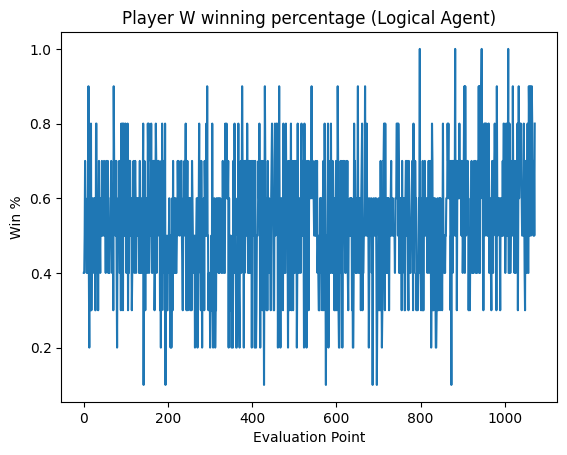

In [4]:
win_percent = utils.plot_logical_agent_win_percent(10)

In [5]:
q_table = pd.read_csv(Config.q_table_path, index_col=[0])
state_mem = json.load(open(Config.agent_state_memory_path, 'r'))
state_mem = {v:k for k,v in state_mem.items()}

In [6]:
q_table

,"(0, 3)_forward","(1, 3)_diagonal2","(0, 0)_diagonal2","(0, 2)_diagonal2","(0, 2)_forward","(0, 0)_diagonal1","(0, 0)_forward","(1, 2)_diagonal1","(0, 1)_diagonal2","(2, 3)_diagonal1",...,"(2, 2)_diagonal1","(1, 1)_diagonal2","(2, 0)_diagonal2","(1, 1)_diagonal1","(2, 2)_diagonal2","(2, 3)_forward","(1, 3)_forward","(2, 0)_diagonal1","(2, 0)_forward","(2, 3)_diagonal2"
state_key,,,,,,,,,,,,,,,,,,,,,
44,1.0,0.000000,-0.900000,-0.900000,1.000,-0.900000,1.000000,0.0,-0.900000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
204,0.0,0.521703,-0.247138,-0.558376,0.271,-0.377624,0.974968,0.0,-0.327898,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.1,0.0,0.0,0.0
1720,0.0,0.000000,-0.100000,-0.100000,0.000,0.000000,0.190000,0.0,-0.100000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1722,0.0,0.000000,-0.100000,0.000000,0.000,0.000000,0.100000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1725,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2613,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1771,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.27381,0.0,0.0,0.0,0.0


In [20]:
#inx = agents.agentW.agent_state_memory[str(agents.agentW.state['board'])]
inx = 1722
try:
    optimal_action = q_table.loc[inx].idxmax().split("_")
    worst_action = q_table.loc[inx].idxmin().split("_")
    start, action = eval(optimal_action[0]), optimal_action[1]
    worst_start, worst_action = eval(worst_action[0]), worst_action[1]
except KeyError:
    pass

In [21]:
start, action

((0, 0), 'forward')

In [22]:
worst_start, worst_action

((0, 0), 'diagonal2')

In [23]:
eval(state_mem[inx])

[['W', 'W', ' ', ' '],
 [' ', ' ', 'W', ' '],
 ['B', ' ', 'B', ' '],
 [' ', ' ', ' ', 'B']]